In [1]:
import pandas as pd
import numpy as np
import cv2
import os
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
# Configuring Matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
savefig_options = dict(format="png", dpi=300, bbox_inches="tight")

# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [161]:

src_cluster_path ='/home/ahmed/Ahmed_data/agglomerative/clusters/clusters'

In [95]:
source_features_path = "/home/ahmed/Ahmed_data/dtw_da/LinerOperation-20230828T203819Z-001/LinerOperation/feat/s1_c0.mp4.npy"
tgt_features_path = "/home/ahmed/Ahmed_data/dtw_da/LinerOperation-20230828T203819Z-001/LinerOperation/feat/s1_c1.mp4.npy"
tgt2_features_path = "/home/ahmed/Ahmed_data/dtw_da/LinerOperation-20230828T203819Z-001/LinerOperation/feat/s1_c2.mp4.npy"

In [96]:
src_feat= np.load(source_features_path)
tgt_feat = np.load(tgt_features_path)
tgt_feat2 = np.load(tgt2_features_path)

In [97]:
#src_gt_path = '/home/ahmed/Ahmed_data/DATASETS/data/DesktopAssembly/groundTruth/2020-04-02-152956'

In [98]:
tgt_feat.shape

(149, 1024)

In [99]:
src_avg_vector= np.mean(src_feat, axis= 0)

In [100]:
tgt_avg_vector= np.mean(tgt_feat, axis= 0)

In [101]:
tgt2_avg_vector= np.mean(tgt_feat2, axis= 0)

In [102]:
from scipy.spatial import distance


In [103]:
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)


In [104]:
euclidean_distance(src_avg_vector, tgt_avg_vector)

0.27899787

In [105]:
euclidean_distance(src_avg_vector, tgt2_avg_vector)

0.27112725

In [106]:


def distance(x, y):
    # Replace this function with your preferred distance metric for video frames
    # You can use methods like Euclidean distance, cosine similarity, or other suitable metrics.
    return np.linalg.norm(x - y)

def dtw_distance_matrix(frames1, frames2):
    n, m = len(frames1), len(frames2)
    distance_matrix = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            distance_matrix[i, j] = distance(frames1[i], frames2[j])

    return distance_matrix

def dtw_alignment(frames1, frames2):
    n, m = len(frames1), len(frames2)
    dtw_matrix = np.zeros((n, m))
    distance_matrix = dtw_distance_matrix(frames1, frames2)

    # Initialize the first row and column of the DTW matrix
    dtw_matrix[0, 0] = distance_matrix[0, 0]
    for i in range(1, n):
        dtw_matrix[i, 0] = float('inf')
    for j in range(1, m):
        dtw_matrix[0, j] = dtw_matrix[0, j - 1] + distance_matrix[0, j]

    # Fill the rest of the DTW matrix
    for i in range(1, n):
        for j in range(1, m):
            cost = distance_matrix[i, j]
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])

    # Backtrack to find the optimal alignment path
    alignment_path = []
    i, j = n - 1, m - 1
    while i > 0 or j > 0:
        alignment_path.append((i, j))
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_neighbor = min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
            if min_neighbor == dtw_matrix[i - 1, j]:
                i -= 1
            elif min_neighbor == dtw_matrix[i, j - 1]:
                j -= 1
            else:
                i -= 1
                j -= 1

    alignment_path.append((0, 0))
    alignment_path.reverse()

    return alignment_path

# Example usage:
# Replace `frames1` and `frames2` with your actual video frame feature vectors
#frames1 = np.random.rand(100, 128)  # Random feature vectors for the first video
#frames2 = np.random.rand(150, 128)  # Random feature vectors for the second video

alignment_path = dtw_alignment(src_feat, tgt_feat)
print("Alignment path:", alignment_path)


Alignment path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (92, 93), (92, 94), (92, 95), (92, 96), (92, 97), (92, 98), (92, 99), (92

In [75]:
[point[1] for point in alignment_path]

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94]

In [76]:


# Create aligned sequences using the extracted indices
aligned_sequence1 = [src_feat[i[0]] for i in alignment_path]
aligned_sequence2 = [tgt_feat[i[1]] for i in alignment_path]


In [77]:

alignment_path_after = dtw_alignment(aligned_sequence1, aligned_sequence2)
print("Alignment path:", alignment_path_after)


Alignment path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (99, 99), (10

In [78]:
dtw_distance_matrix(src_feat,tgt_feat )

array([[0.37838092, 0.37608039, 0.37624845, ..., 0.37803975, 0.38188264,
        0.3816421 ],
       [0.37954819, 0.37791285, 0.37916788, ..., 0.37396768, 0.37746635,
        0.37680671],
       [0.36560345, 0.3625969 , 0.3655161 , ..., 0.36093199, 0.36487448,
        0.36490971],
       ...,
       [0.33039388, 0.32587072, 0.33473074, ..., 0.35366222, 0.35850099,
        0.36449799],
       [0.32405722, 0.32068342, 0.33031437, ..., 0.35324425, 0.3577756 ,
        0.36398298],
       [0.32241166, 0.32010296, 0.33143628, ..., 0.34980863, 0.35499084,
        0.3602531 ]])

In [107]:

# Calculate the DTW distance before alignment
distance_before, _ = fastdtw(src_feat, tgt_feat2, dist=euclidean)
print(distance_before)

46.34207476419945


In [108]:

# Calculate the DTW distance before alignment
distance_before, _ = fastdtw(src_feat, tgt_feat, dist=euclidean)
print(distance_before)

60.98185839613025


In [80]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw  # You can use the FastDTW implementation for speed


# Calculate the DTW distance before alignment
distance_before, _ = fastdtw(src_feat, tgt_feat2, dist=euclidean)

# Perform alignment using DTW (you should have this step)

# Calculate the DTW distance after alignment
distance_after, _ = fastdtw(aligned_sequence1, aligned_sequence2, dist=euclidean)

# Calculate the improvement in DTW distance
improvement = distance_before - distance_after

# Set a threshold to classify alignments as "good" or "bad"
threshold = 10.0  # You should adjust this based on your data and requirements

# Compare the improvement to the threshold
if improvement >= threshold:
    alignment_quality = "Good"
else:
    alignment_quality = "Bad"

# Print the results
print(f"DTW Distance before alignment: {distance_before}")
print(f"DTW Distance after alignment: {distance_after}")
print(f"Improvement in DTW Distance: {improvement}")
print(f"Alignment Quality: {alignment_quality}")


DTW Distance before alignment: 46.34207476419945
DTW Distance after alignment: 41.06101826194493
Improvement in DTW Distance: 5.281056502254522
Alignment Quality: Bad


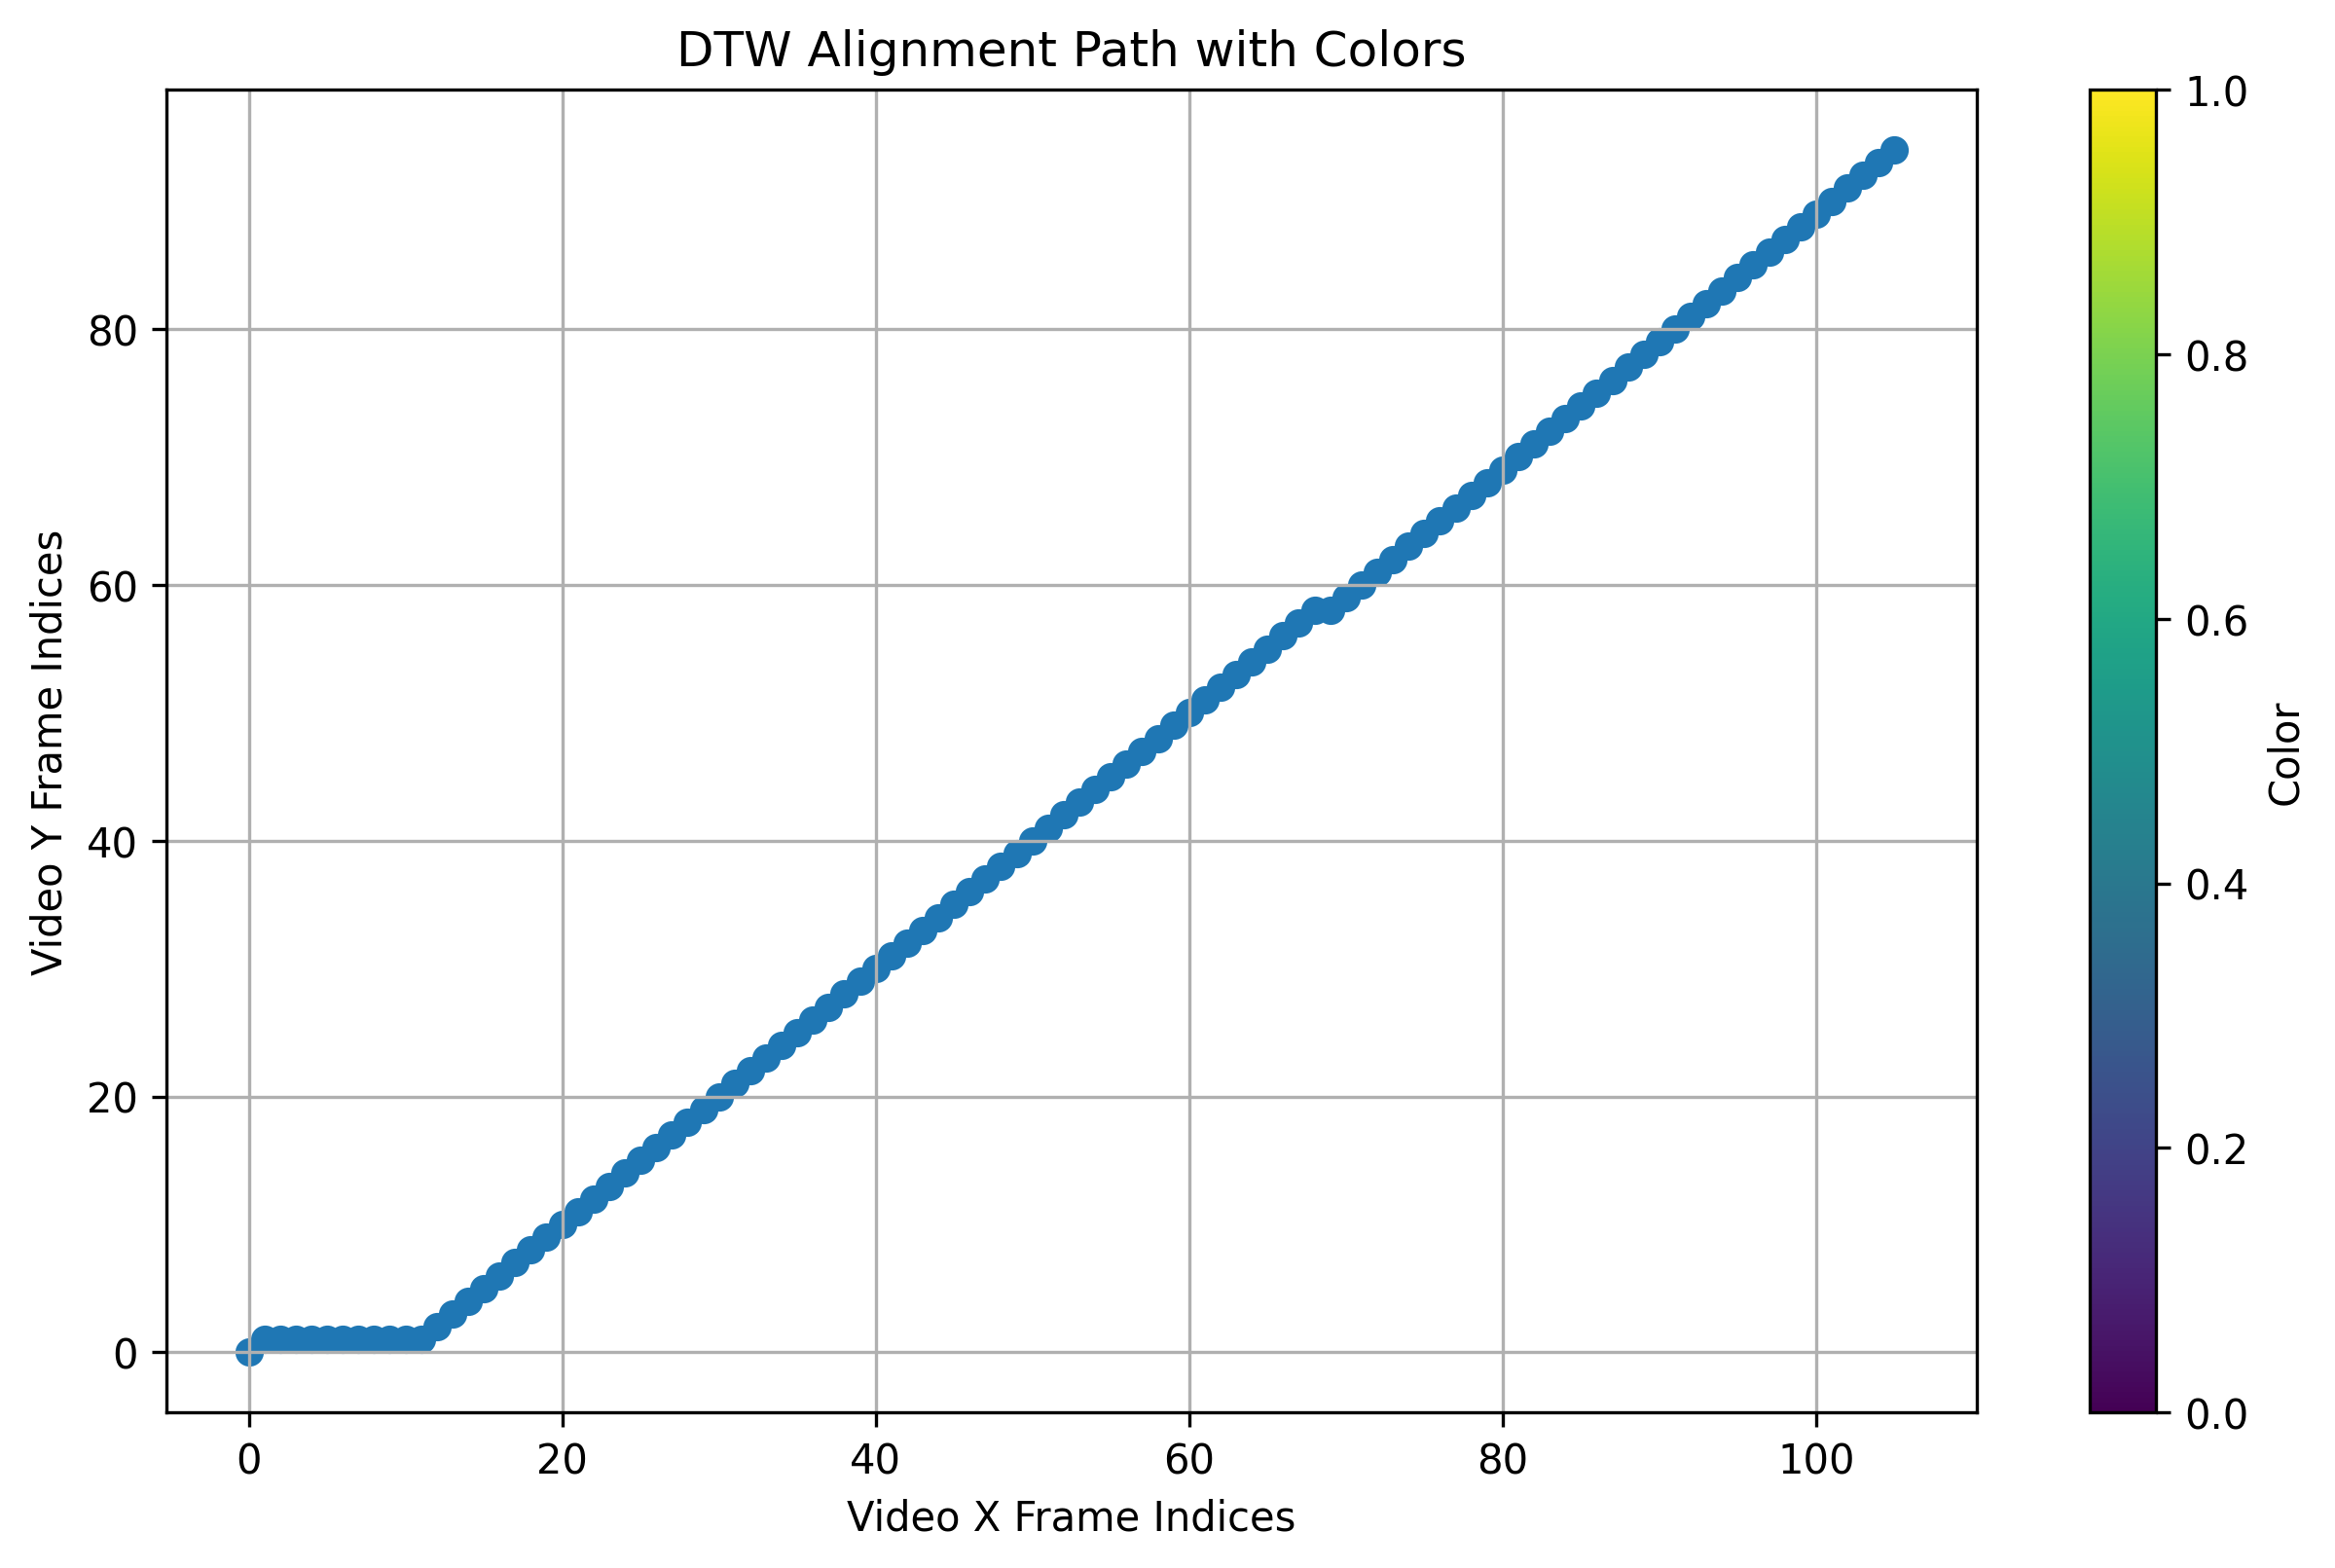

In [63]:
import matplotlib.pyplot as plt

# Create a visualization of the alignment path

#colors = np.random.randint(1, 6, size=len(src_feat))  # Random colors (1 to 5) for the alignment path

# Separate x_indices and y_indices from the alignment path
x_indices = [i for i, _ in alignment_path]
y_indices = [j for _, j in alignment_path]
#path_colors = [colors[i] for i in x_indices]

# Create a colormap using ListedColormap
num_unique_colors = 1#len(np.unique(colors))
cmap = plt.get_cmap('viridis', num_unique_colors)

# Create a visualization of the alignment path with colors
plt.figure(figsize=(10, 6))
plt.scatter(x_indices, y_indices, cmap=cmap, marker='o')
plt.xlabel('Video X Frame Indices')
plt.ylabel('Video Y Frame Indices')
plt.title('DTW Alignment Path with Colors')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()




In [64]:
alignment_path = dtw_alignment(src_feat, tgt_feat2)
print("Alignment path:", alignment_path)

Alignment path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 43), (45, 43), (46, 43), (47, 43), (48, 43), (49, 44), (50, 45), (51, 46), (52, 47), (53, 48), (54, 49), (55, 50), (56, 51), (57, 52), (58, 53), (59, 54), (60, 55), (61, 56), (62, 57), (63, 58), (64, 59), (65, 60), (66, 61), (67, 62), (68, 63), (69, 64), (70, 65), (71, 66), (72, 67), (73, 68), (74, 69), (75, 70), (76, 71), (77, 72), (78, 73), (79, 74), (80, 75), (81, 76), (82, 77), (83, 78), (84, 79), (85, 80), (86, 81), (87, 82), (88, 83), (89, 84), (90, 85), (91, 86), (92, 87), (93, 88), (94, 89), (95, 90), (96, 91), (97, 92), (98, 93), (99, 94), (10

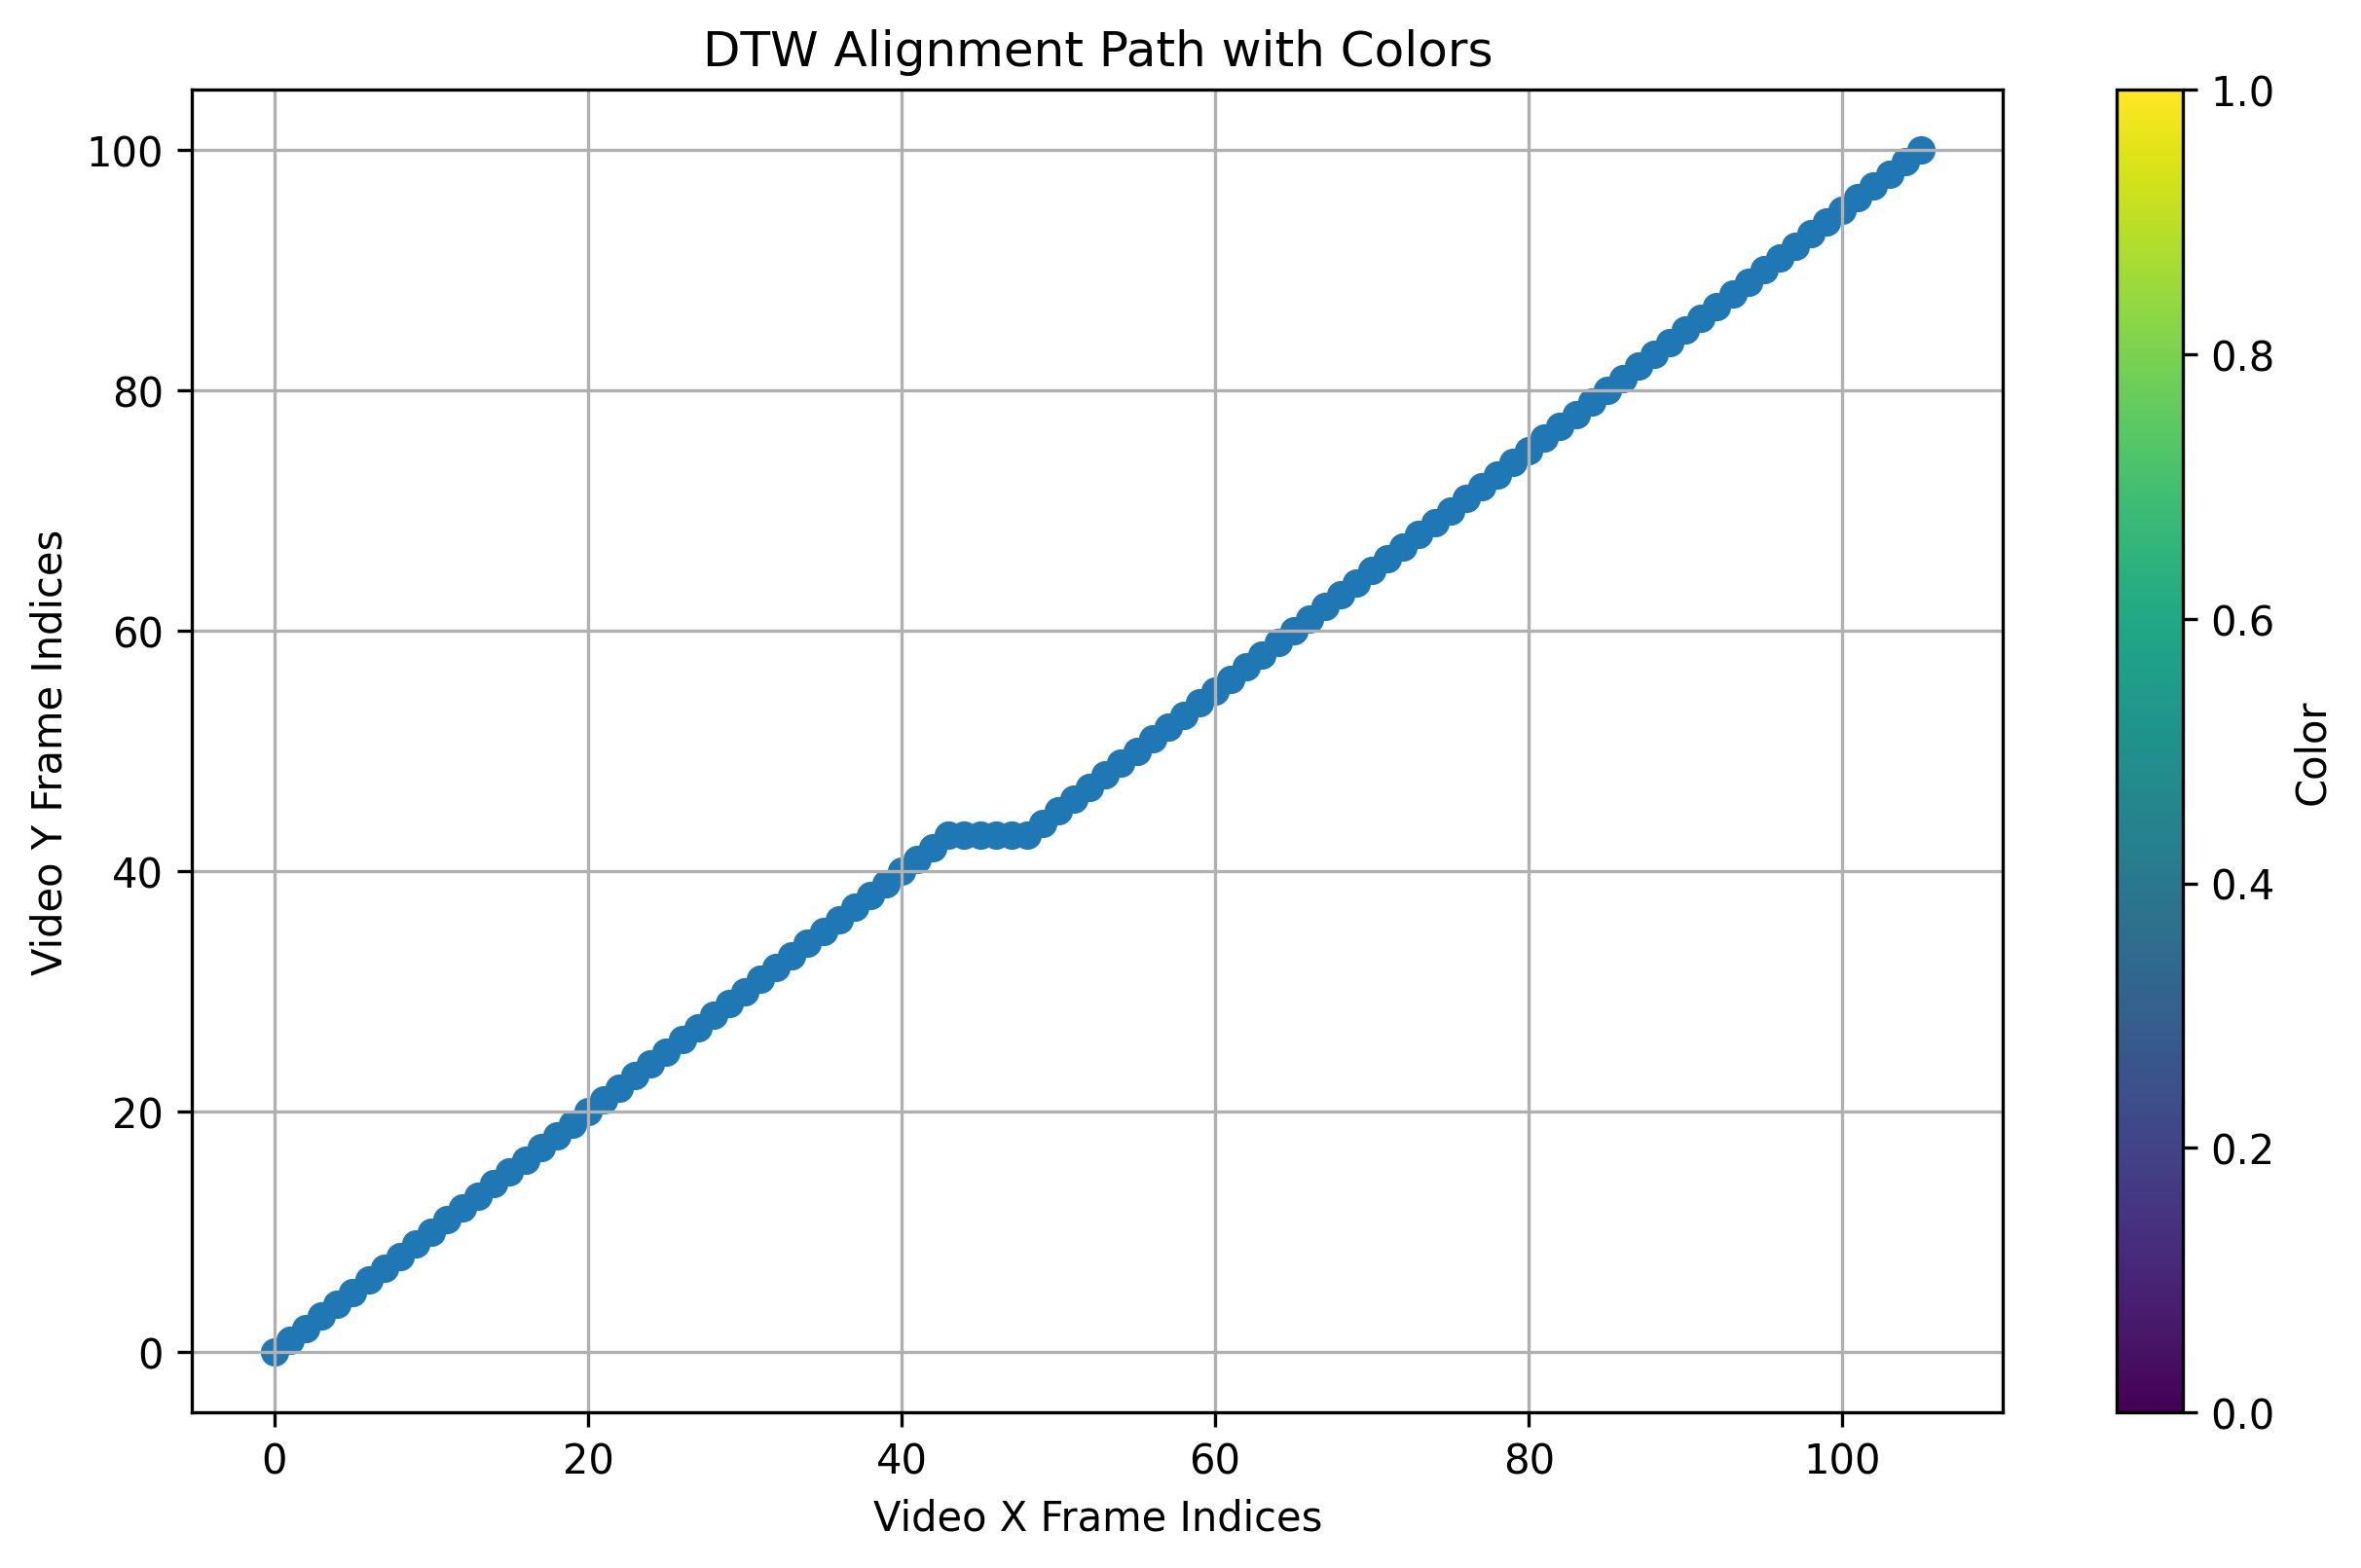

In [28]:
# Separate x_indices and y_indices from the alignment path
x_indices = [i for i, _ in alignment_path]
y_indices = [j for _, j in alignment_path]
#path_colors = [colors[i] for i in x_indices]

# Create a colormap using ListedColormap
num_unique_colors = 1#len(np.unique(colors))
cmap = plt.get_cmap('viridis', num_unique_colors)

# Create a visualization of the alignment path with colors
plt.figure(figsize=(10, 6))
plt.scatter(x_indices, y_indices, cmap=cmap, marker='o')
plt.xlabel('Video X Frame Indices')
plt.ylabel('Video Y Frame Indices')
plt.title('DTW Alignment Path with Colors')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()


In [205]:

# Calculate the Euclidean norms for each row
row_norms = np.linalg.norm(distances, axis=1, keepdims=True)

# Perform row normalization
normalized_data = distances / row_norms


<AxesSubplot:>

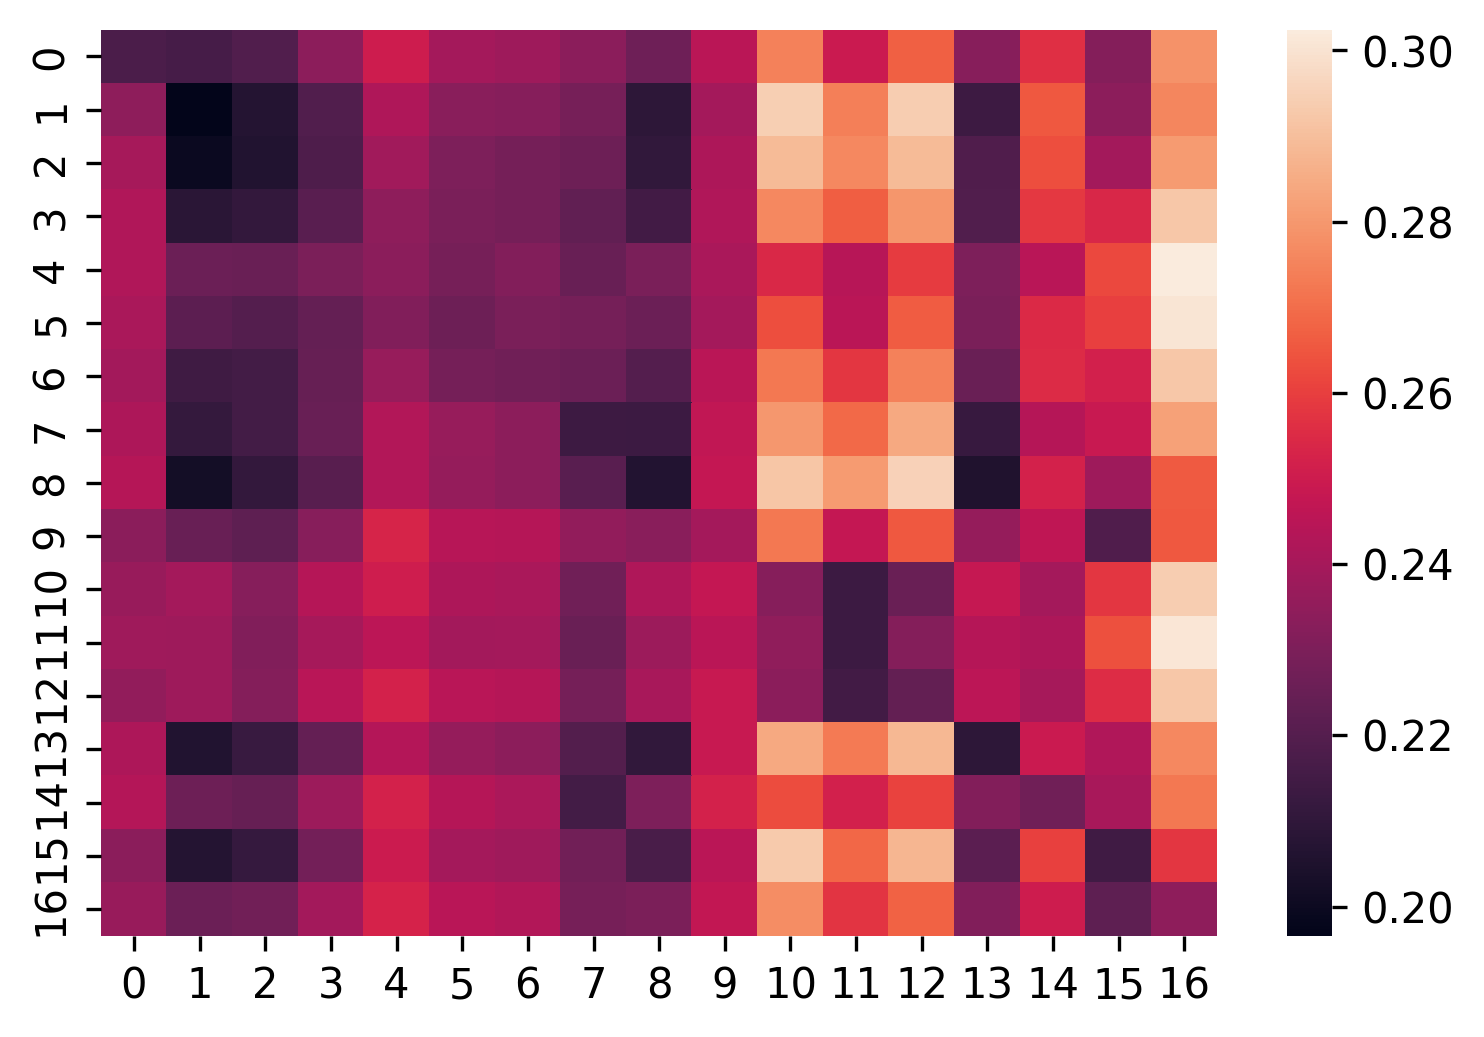

In [206]:
sns.heatmap(normalized_data)

In [49]:
from sklearn.metrics.pairwise import cosine_similarity


In [121]:
# Calculate the cosine similarity between the two video clips
similarity_matrix = cosine_similarity(src_avg_feature_vectors, tgt_avg_feature_vectors)


<AxesSubplot:>

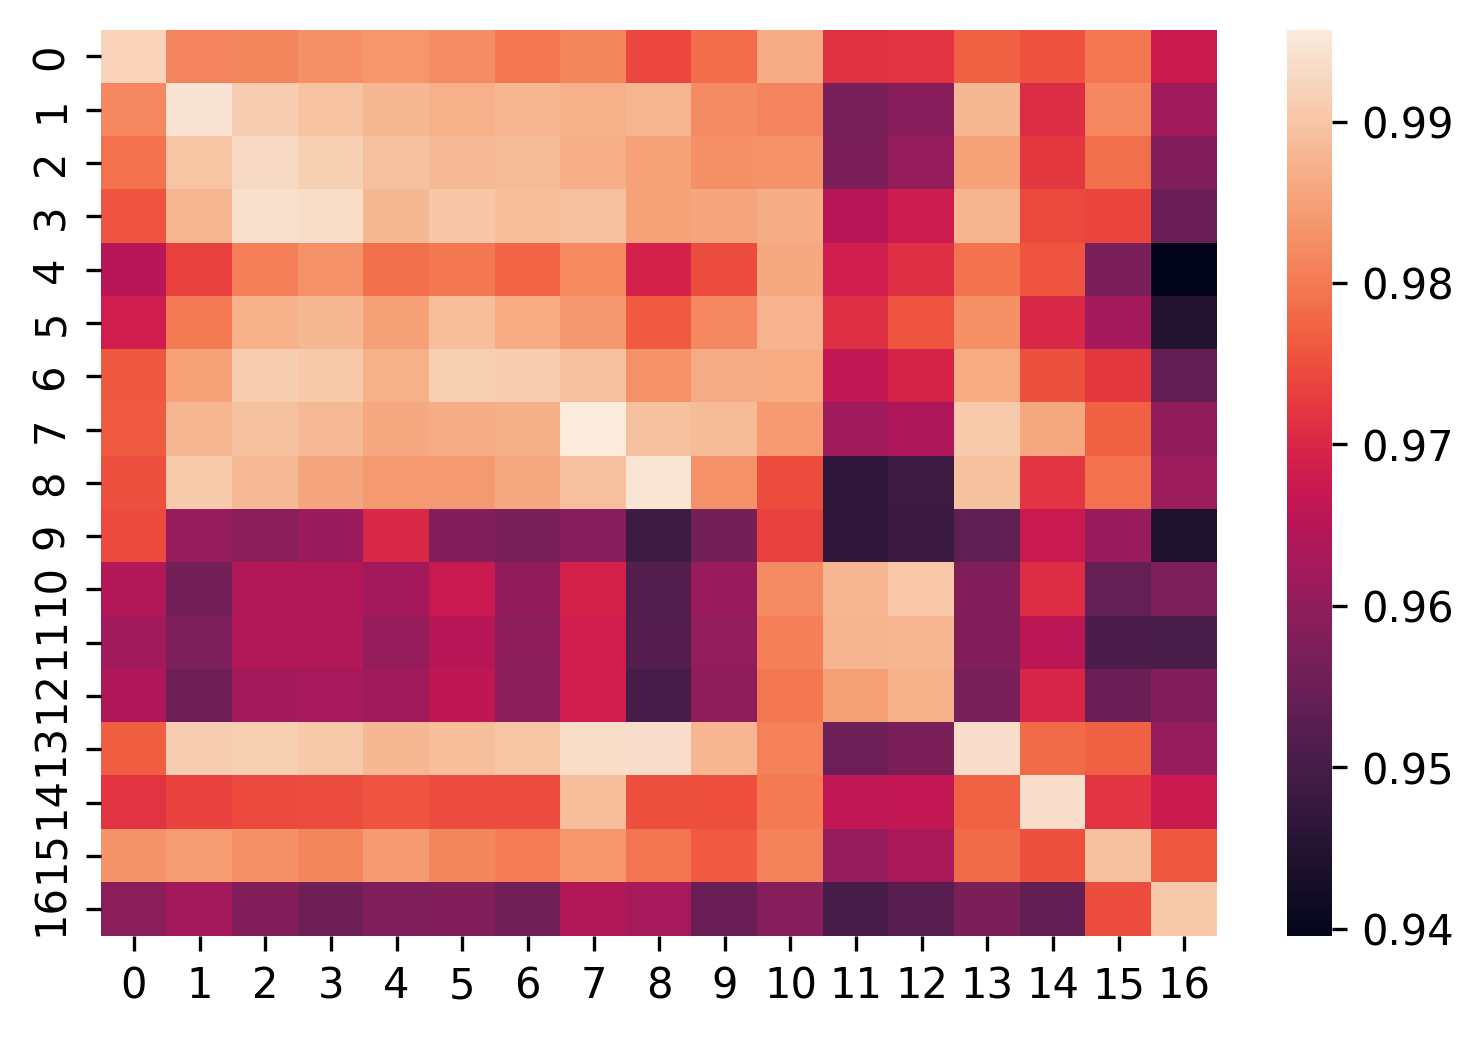

In [123]:
sns.heatmap(similarity_matrix)

In [130]:
src_feat[np.newaxis, :, :].shape

(1, 1873, 1024)

In [50]:
src_avg_feature_vectors = []
for k, (start_idx , end_idx) in src_indices.items():
    ssd_values = np.sum((src_feat[start_idx:end_idx, np.newaxis, :] - src_feat[np.newaxis, start_idx:end_idx, :])**2, axis=2)
    representative_frame_index = np.argmin(np.sum(ssd_values, axis=1))
    representative_frame = src_feat[representative_frame_index]
    src_avg_feature_vectors.append(representative_frame)

In [51]:
tgt_avg_feature_vectors = []
for k, (start_idx , end_idx) in tgt_indices.items():
    ssd_values = np.sum((tgt_feat[start_idx:end_idx, np.newaxis, :] - tgt_feat[np.newaxis, start_idx:end_idx, :])**2, axis=2)
    representative_frame_index = np.argmin(np.sum(ssd_values, axis=1))
    representative_frame = tgt_feat[representative_frame_index]
    tgt_avg_feature_vectors.append(representative_frame)

In [52]:
tgt_avg_feature_vectors

[array([0.08866518, 0.00299558, 0.07900211, ..., 0.06196458, 0.01086361,
        0.01140327], dtype=float32),
 array([0.09024791, 0.00610406, 0.07581791, ..., 0.06240777, 0.01065654,
        0.02541798], dtype=float32),
 array([0.09297149, 0.00389464, 0.07510313, ..., 0.0671946 , 0.00987492,
        0.01597371], dtype=float32),
 array([0.09258322, 0.00283224, 0.06913999, ..., 0.07329538, 0.01074696,
        0.01564032], dtype=float32),
 array([0.08479971, 0.00168148, 0.07679202, ..., 0.06424401, 0.00925219,
        0.01292809], dtype=float32),
 array([0.10021856, 0.00460749, 0.07519865, ..., 0.05645151, 0.00975261,
        0.01152333], dtype=float32),
 array([0.08706719, 0.00365289, 0.07489635, ..., 0.06125278, 0.00947687,
        0.0115117 ], dtype=float32),
 array([0.09297149, 0.00389464, 0.07510313, ..., 0.0671946 , 0.00987492,
        0.01597371], dtype=float32),
 array([0.10557426, 0.00209445, 0.07273429, ..., 0.06085297, 0.0093452 ,
        0.01073494], dtype=float32),
 array([0.

In [53]:
distances = distance.cdist(np.array(src_avg_feature_vectors), tgt_avg_feature_vectors)

<AxesSubplot:>

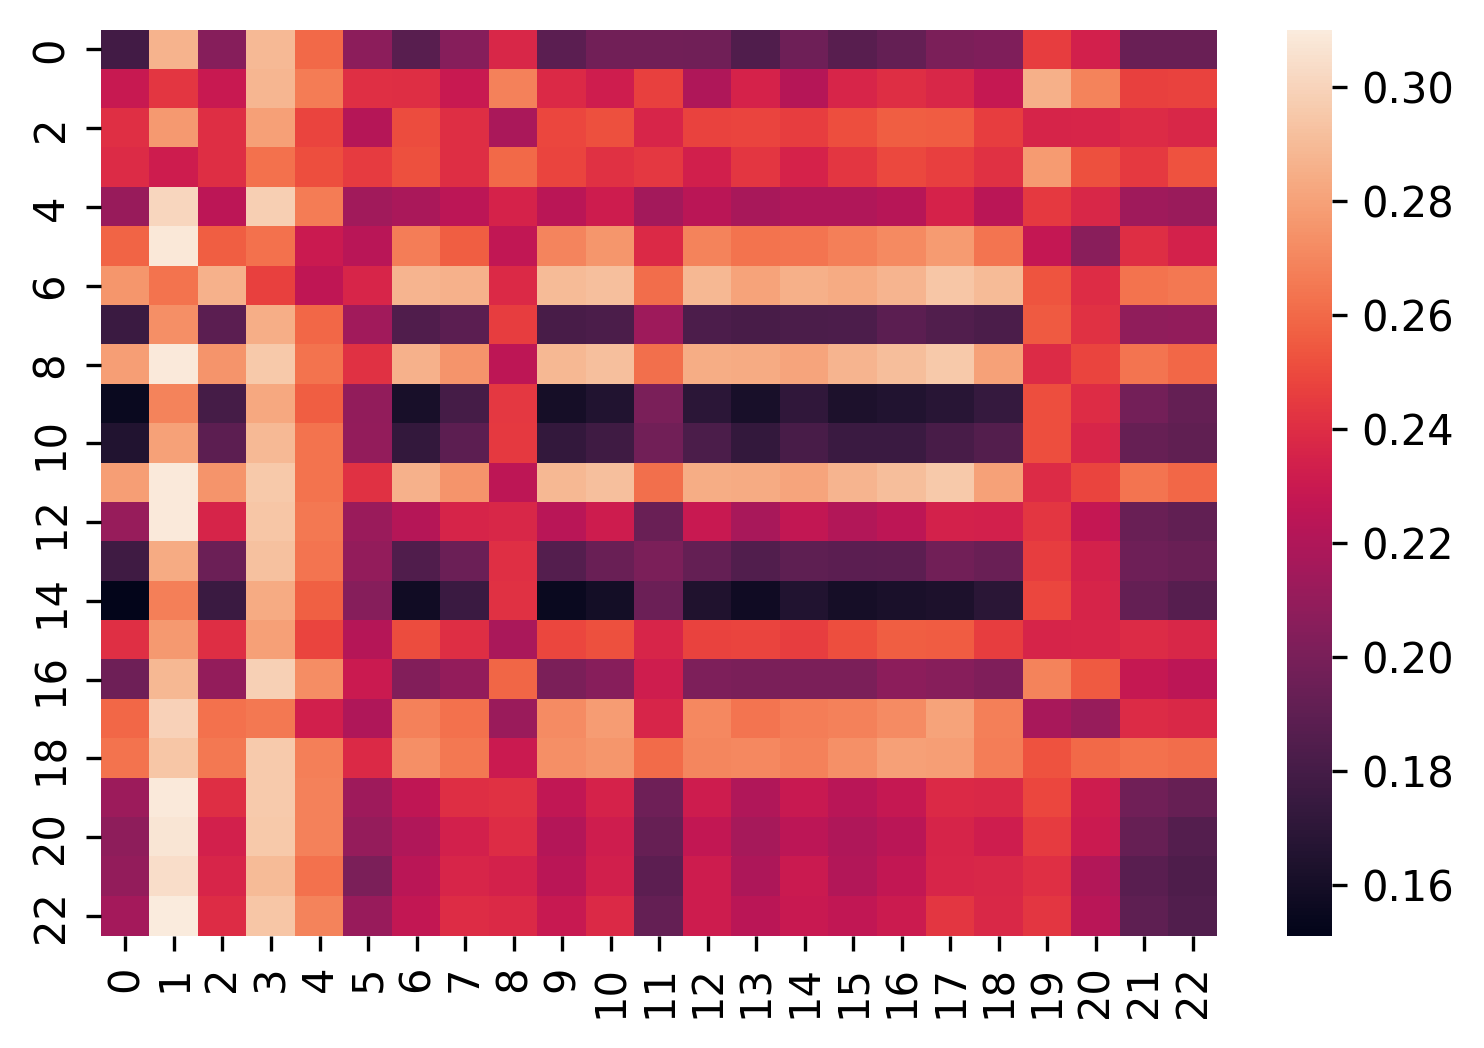

In [54]:
sns.heatmap(distances)

In [55]:
# Calculate the cosine similarity between the two video clips
similarity_matrix = cosine_similarity(src_avg_feature_vectors, tgt_avg_feature_vectors)


<AxesSubplot:>

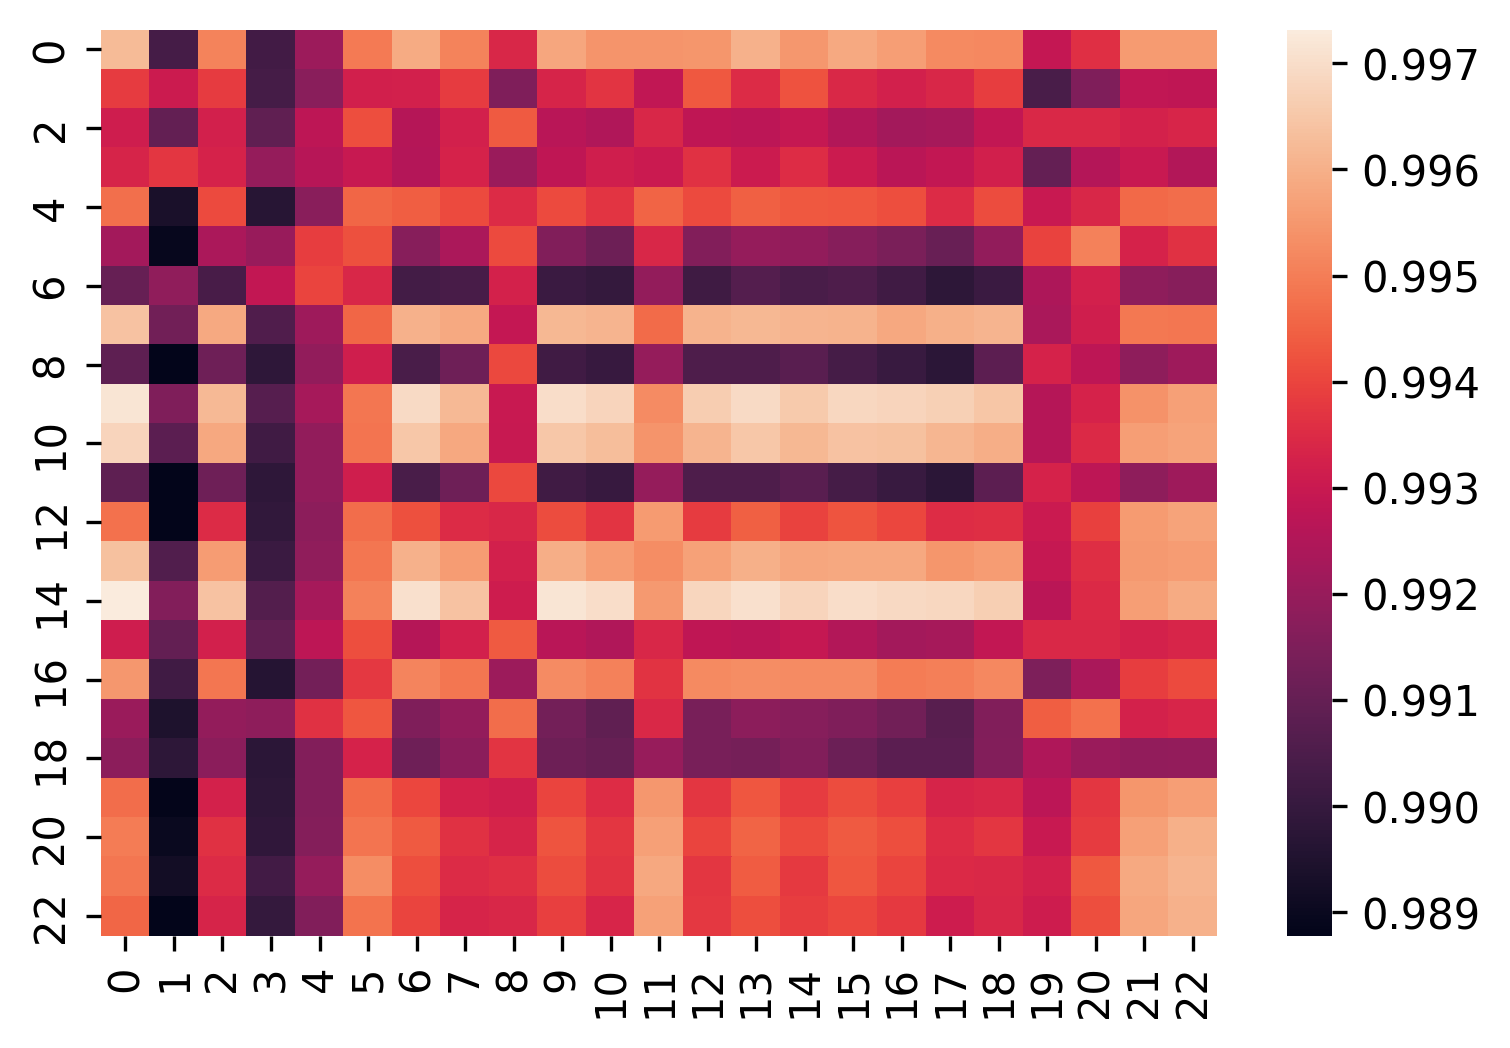

In [56]:
sns.heatmap(similarity_matrix)

In [57]:
from sklearn.cluster import KMeans


In [58]:
num_clusters = 1

In [59]:
src_avg_feature_vectors = []
for k, (start_idx , end_idx) in src_indices.items():
    print(start_idx, end_idx)
    # Create a k-means model and fit it to the data
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(src_feat[start_idx:end_idx])
    representative_frames = kmeans.cluster_centers_
    print(representative_frames)
    src_avg_feature_vectors.append(representative_frames[0])

0 156
[[0.09208357 0.00316306 0.08130675 ... 0.05760589 0.00843424 0.01554192]]
157 981
[[0.0874805  0.00369783 0.07970714 ... 0.06096272 0.00900705 0.02670833]]
982 1042
[[0.10137817 0.00559026 0.09069532 ... 0.07226669 0.00718469 0.03885294]]
1043 1341
[[0.09145863 0.00259888 0.07943715 ... 0.06556291 0.0098366  0.02979955]]
1342 1587
[[0.0942121  0.00294399 0.07636715 ... 0.06365033 0.00947015 0.03616274]]
1588 1629
[[0.09730245 0.00426242 0.08142505 ... 0.07543319 0.00751148 0.04267604]]
1630 2007
[[0.0865097  0.0038668  0.07877793 ... 0.06147412 0.00907865 0.03107081]]
2008 2098
[[0.09073862 0.00537766 0.08387157 ... 0.05730342 0.00562738 0.02550603]]
2099 2151
[[0.10150054 0.01153286 0.07554922 ... 0.05248313 0.00475796 0.02293522]]
2152 2254
[[0.09142196 0.00388554 0.08155248 ... 0.05331879 0.00742947 0.01482089]]
2255 2409
[[0.09564039 0.00237057 0.07963414 ... 0.05435491 0.00422791 0.02459388]]
2410 2470
[[0.09627128 0.00799343 0.0747932  ... 0.05851774 0.00511684 0.02800077]]

In [60]:
tgt_avg_feature_vectors = []
for k, (start_idx , end_idx) in tgt_indices.items():
    
    # Create a k-means model and fit it to the data
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tgt_feat[start_idx:end_idx])
    representative_frames = kmeans.cluster_centers_
    tgt_avg_feature_vectors.append(representative_frames[0])

In [61]:
distances = distance.cdist(np.array(src_avg_feature_vectors), np.array(tgt_avg_feature_vectors))

<AxesSubplot:>

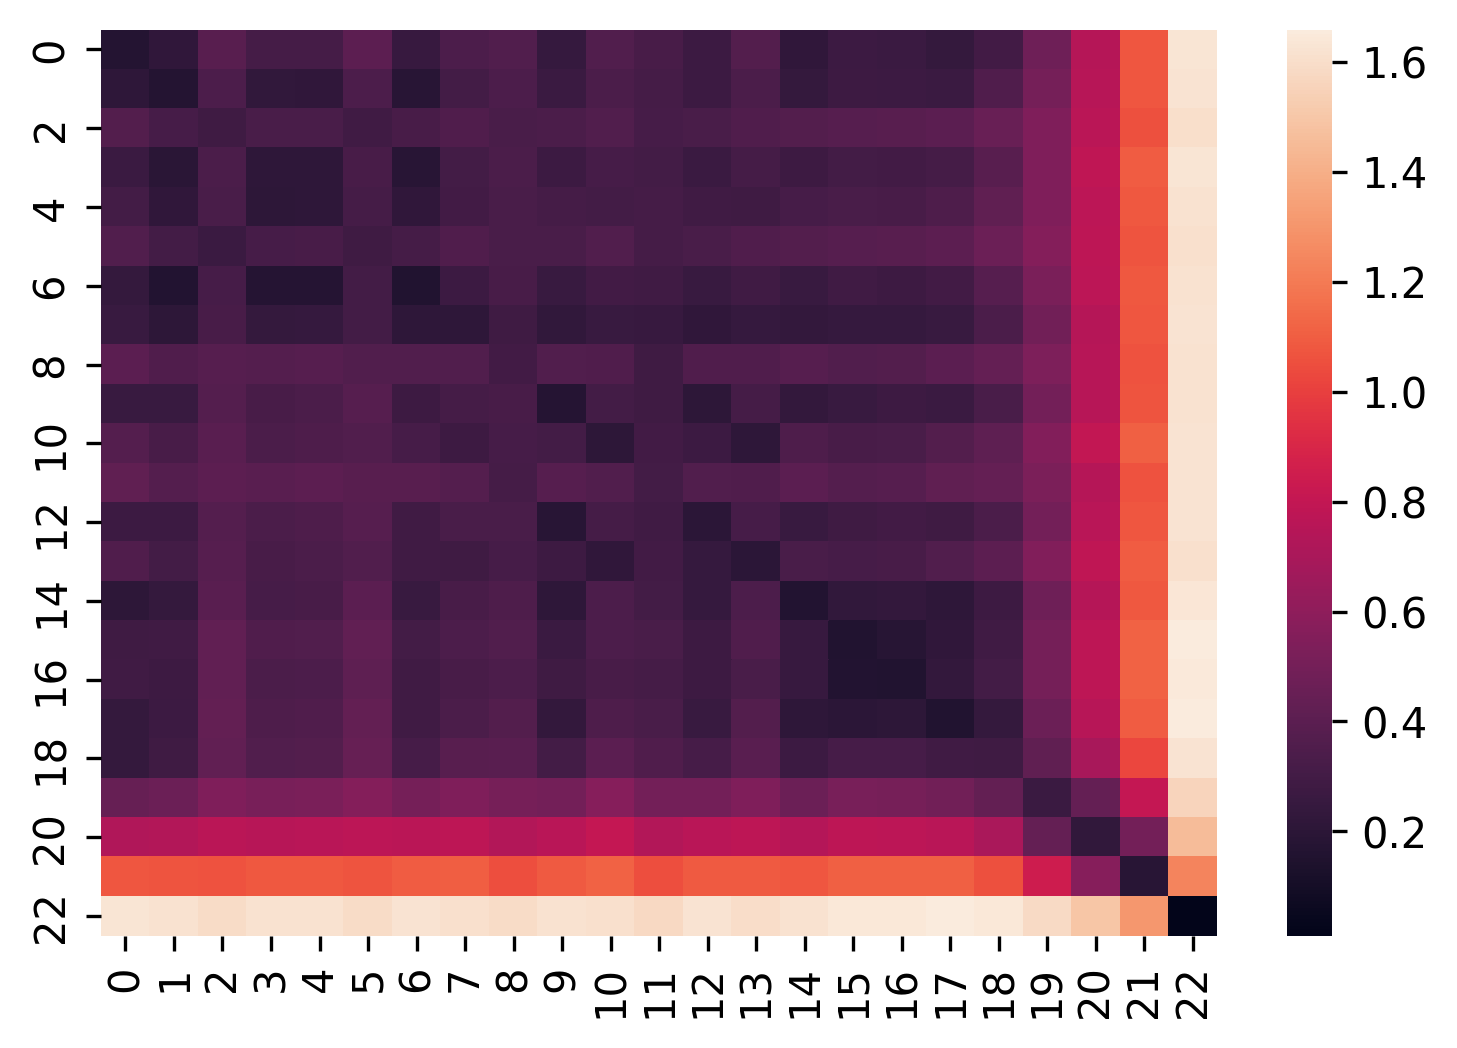

In [62]:
sns.heatmap(distances)

In [63]:
# Calculate the cosine similarity between the two video clips
similarity_matrix = cosine_similarity(src_avg_feature_vectors, tgt_avg_feature_vectors)


<AxesSubplot:>

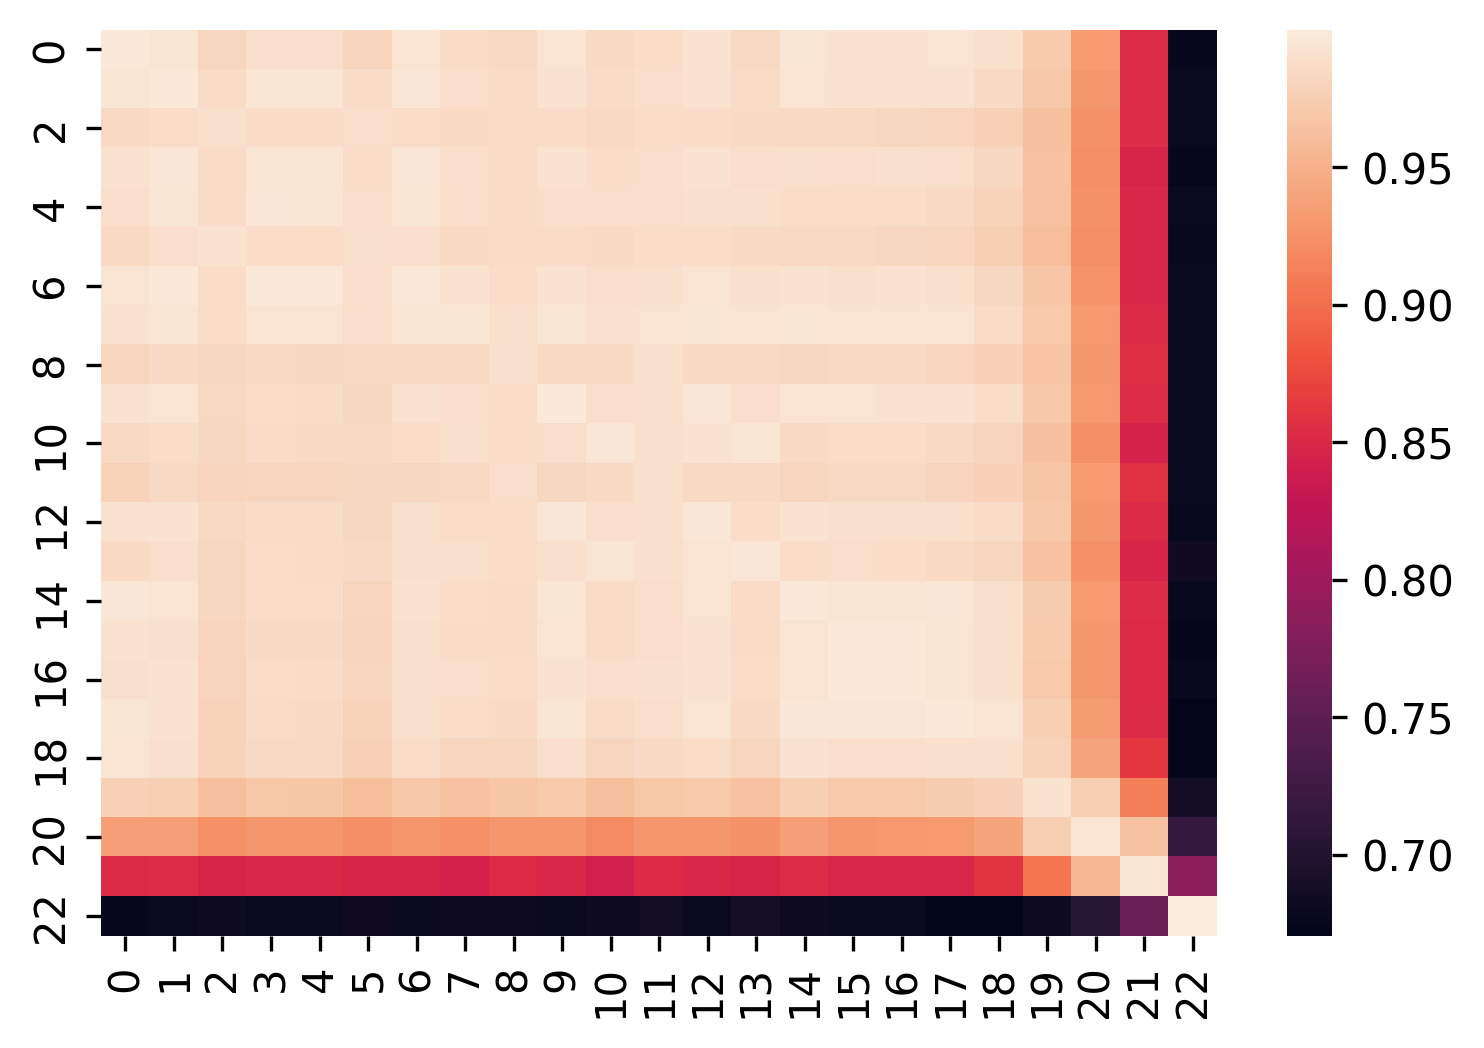

In [64]:
sns.heatmap(similarity_matrix)

In [66]:
src_indices.items()

dict_items([(0, (0, 156)), (1, (157, 981)), (2, (982, 1042)), (3, (1043, 1341)), (4, (1342, 1587)), (5, (1588, 1629)), (6, (1630, 2007)), (7, (2008, 2098)), (8, (2099, 2151)), (9, (2152, 2254)), (10, (2255, 2409)), (11, (2410, 2470)), (12, (2471, 2519)), (13, (2520, 2659)), (14, (2660, 2744)), (15, (2745, 3331)), (16, (3332, 3700)), (17, (3701, 3902)), (18, (3903, 3955)), (19, (3956, 3982)), (20, (3983, 4004)), (21, (4005, 4016)), (22, (4017, 4052))])

In [76]:
alignment_path[4017:4052]

[(3976, 3427),
 (3977, 3428),
 (3978, 3429),
 (3979, 3430),
 (3980, 3431),
 (3981, 3432),
 (3982, 3433),
 (3983, 3434),
 (3984, 3435),
 (3985, 3436),
 (3986, 3437),
 (3987, 3438),
 (3988, 3439),
 (3989, 3440),
 (3990, 3441),
 (3991, 3442),
 (3992, 3443),
 (3993, 3444),
 (3994, 3445),
 (3995, 3446),
 (3996, 3447),
 (3997, 3448),
 (3998, 3449),
 (3999, 3450),
 (4000, 3451),
 (4001, 3452),
 (4002, 3453),
 (4003, 3454),
 (4004, 3455),
 (4005, 3456),
 (4006, 3457),
 (4007, 3458),
 (4008, 3459),
 (4009, 3460),
 (4010, 3461)]

In [78]:
src_feat.shape

(4053, 1024)

In [154]:
distance_matrix.shape

(1873, 1972)

In [207]:
ci = []
for k , (start_idx, end_idx) in src_indices.items():
    
    indexes= []
    for s, t in alignment_path: 
        if  s>= start_idx and s<= end_idx: 
            indexes.append((s,t))
    #indexes= alignment_path[start_idx: end_idx]
    print(indexes)
    errors= 0
    for s, t in indexes:
        
        errors+=distance_matrix[s,t]
    norm_errors=errors/(end_idx-start_idx)
    ci.append(norm_errors)

[(0, 0), (1, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 16), (7, 17), (7, 18), (8, 19), (8, 20), (8, 21), (8, 22), (8, 23), (8, 24), (8, 25), (8, 26), (9, 27), (9, 28), (9, 29), (9, 30), (9, 31), (9, 32), (9, 33), (9, 34), (9, 35), (10, 36), (11, 37), (12, 38), (13, 39), (14, 40), (15, 41), (16, 42), (17, 43), (17, 44), (17, 45), (17, 46), (17, 47), (17, 48), (17, 49), (17, 50), (17, 51), (17, 52), (17, 53), (17, 54), (17, 55), (17, 56), (17, 57), (17, 58), (17, 59), (17, 60), (17, 61), (17, 62), (17, 63), (17, 64), (17, 65), (17, 66), (17, 67), (17, 68), (17, 69), (17, 70), (17, 71), (17, 72), (17, 73), (18, 74), (19, 75), (20, 76), (21, 77), (22, 78), (23, 79), (24, 80), (25, 81), (26, 82), (27, 83), (28, 84), (29, 85), (30, 86), (31, 87), (32, 88), (33, 89), (34, 90), (35, 91), (36, 92), (37, 93), (38, 94), (39, 95), (40, 96), (41, 97), (42, 98), (43, 99), (44, 100), (45, 101), (46, 102), (47, 103), (

In [208]:
ci

[1.635406510483834,
 2.3029397933221443,
 1.722189909796561,
 0.6810643574150886,
 0.7573916482925415,
 0.6884790893677062,
 0.6918765459305201,
 0.8527692589041305,
 1.0450333035909212,
 0.8091933944008567,
 1.6591087472625077,
 1.0030086880380458,
 1.041332972438439,
 0.7580519176342271,
 0.7217958227351859,
 0.7141403765291781,
 0.712603129280938]

In [209]:
errors= []
for k,(s, e) in src_indices.items(): 
    for i in range(s,e+1): 
           errors.append(ci[k])

In [210]:
def combine_frames_with_errors(frame_dir1, frame_dir2, frame_indexes, output_path, errors):
    target_width, target_height = 640, 480

    # Get a sorted list of frame filenames in each directory
    frame_files1 = sorted(os.listdir(frame_dir1))
    frame_files2 = sorted(os.listdir(frame_dir2))
    print(frame_files1)
    # Create the output video writer
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 25, (2 * target_width, target_height))

    for index1, index2 in frame_indexes:
        if index1 >= len(frame_files1) or index2 >= len(frame_files2):
            print("here  " , str(index1))
            break
        print(index1, index2)
        # Read frames from both directories
        frame_path1 = os.path.join(frame_dir1, frame_files1[index1])
        
        frame_path2 = os.path.join(frame_dir2, frame_files2[index2])
        
        
        frame1 = cv2.imread(frame_path1)
        frame2 = cv2.imread(frame_path2)

        if frame1 is not None and frame2 is not None:
            # Resize frames to the target size
            frame1_resized = cv2.resize(frame1, (target_width, target_height))
            frame2_resized = cv2.resize(frame2, (target_width, target_height))
            tgt_index = find_clip_key(tgt_indices, index2)
            src_index = find_clip_key(src_indices, index1)
            print(tgt_index)
            start_idx_tgt, end_idx_tgt= tgt_indices.get(tgt_index)
            start_idx, end_idx= src_indices.get(tgt_index)
            timeline_tgt = f"Frame: {index2} Clip {tgt_index}: {start_idx_tgt} - {end_idx_tgt} "
            timeline_frame = cv2.putText(frame2_resized, timeline_tgt, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            timeline = f"Clip {tgt_index}: {start_idx} - {end_idx} Distance: {errors[index1]}"
            resized_image = cv2.putText(frame1_resized, timeline, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Combine the frames horizontally
            combined_frame = cv2.hconcat([resized_image, timeline_frame])

            # Write the combined frame to the output video
            out.write(combined_frame)

    # Release the video writer
    out.release()


In [211]:
output_path  = '/home/ahmed/Ahmed_data/agglomerative/output/clamp-lamp-assembly__2020-12-1714-52-10_errors.avi'
combine_frames_with_errors(src_frames_path,tgt_frames_path, alignment_path,  output_path, errors)


['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.png', '00067.png', '00068.png', '00069.png', '00070.png', '00071.png', '00072.png', '00073.png', '00074.png', '00075.png', '00076.png'

0
3 7
0
3 8
0
3 9
0
4 10
0
5 11
0
5 12
0
5 13
0
5 14
0
5 15
0
6 16
0
7 17
0
7 18
0
8 19
0
8 20
0
8 21
0
8 22
0
8 23
0
8 24
0
8 25
0
8 26
0
9 27
0
9 28
0
9 29
0
9 30
0
9 31
0
9 32
0
9 33
0
9 34
0
9 35
0
10 36
0
11 37
0
12 38
0
13 39
0
14 40
0
15 41
0
16 42
0
17 43
0
17 44
0
17 45
0
17 46
0
17 47
0
17 48
0
17 49
0
17 50
0
17 51
0
17 52
0
17 53
0
17 54
0
17 55
0
17 56
0
17 57
0
17 58
0
17 59
0
17 60
0
17 61
0
17 62
0
17 63
0
17 64
0
17 65
0
17 66
0
17 67
0
17 68
0
17 69
0
17 70
0
17 71
0
17 72
0
17 73
0
18 74
0
19 75
0
20 76
0
21 77
0
22 78
0
23 79
0
24 80
0
25 81
0
26 82
0
27 83
0
28 84
0
29 85
0
30 86
0
31 87
0
32 88
0
33 89
0
34 90
0
35 91
0
36 92
0
37 93
0
38 94
0
39 95
0
40 96
0
41 97
0
42 98
0
43 99
0
44 100
0
45 101
0
46 102
0
47 103
0
48 104
0
49 105
0
50 106
0
50 107
0
50 108
0
50 109
0
50 110
0
50 111
0
50 112
0
50 113
0
50 114
0
50 115
0
50 116
0
50 117
0
50 118
0
50 119
0
50 120
0
50 121
0
50 122
0
50 123
0
50 124
0
50 125
0
50 126
0
50 127
0
50 128
0
50 129
0
50 130
0
50 131


2
281 914
2
281 915
2
281 916
2
281 917
2
281 918
2
281 919
2
281 920
2
281 921
2
281 922
2
281 923
2
281 924
2
281 925
2
281 926
2
281 927
2
281 928
2
281 929
2
281 930
2
281 931
2
281 932
2
281 933
2
281 934
2
281 935
2
281 936
2
281 937
2
281 938
2
281 939
2
281 940
2
281 941
2
281 942
2
281 943
2
281 944
2
281 945
2
281 946
2
281 947
2
281 948
2
281 949
2
281 950
2
281 951
2
281 952
2
281 953
2
281 954
2
281 955
2
281 956
2
281 957
2
281 958
2
281 959
2
281 960
2
281 961
2
281 962
2
281 963
2
281 964
2
281 965
2
281 966
2
281 967
2
281 968
2
281 969
2
281 970
2
281 971
2
281 972
2
281 973
2
281 974
2
281 975
2
281 976
2
281 977
2
281 978
2
281 979
2
281 980
2
281 981
2
281 982
2
281 983
2
281 984
2
281 985
2
281 986
2
281 987
2
281 988
2
281 989
2
281 990
2
281 991
2
281 992
2
281 993
2
281 994
2
281 995
2
281 996
2
281 997
2
281 998
2
281 999
2
281 1000
2
281 1001
2
281 1002
2
281 1003
2
281 1004
2
281 1005
2
281 1006
2
281 1007
2
281 1008
2
281 1009
2
281 1010
2
281 1011
2
281 10

841 1669
5
842 1670
5
843 1671
5
844 1672
6
845 1673
6
846 1674
6
847 1675
6
848 1676
6
849 1677
6
850 1678
6
851 1679
6
852 1680
6
853 1681
6
854 1682
6
855 1683
6
856 1684
6
857 1685
6
858 1686
6
859 1687
6
860 1688
6
861 1689
6
862 1690
6
863 1691
6
864 1692
6
865 1693
6
866 1694
6
867 1695
6
868 1696
6
869 1697
6
870 1698
6
871 1699
6
872 1700
6
873 1701
6
874 1702
6
875 1703
6
876 1704
6
877 1705
6
878 1706
6
879 1707
6
880 1708
6
881 1709
6
882 1710
6
883 1711
6
884 1712
6
885 1713
6
886 1714
6
887 1715
6
888 1716
6
889 1717
6
890 1718
6
891 1719
6
892 1720
6
893 1721
6
894 1722
6
895 1723
6
896 1724
6
897 1725
6
898 1726
6
899 1727
6
900 1728
6
901 1729
6
902 1730
6
903 1731
6
904 1732
6
905 1733
6
906 1734
6
907 1735
6
908 1736
6
909 1737
6
910 1738
6
911 1739
6
912 1740
6
913 1741
6
914 1742
6
915 1743
6
916 1744
6
917 1745
6
918 1746
6
919 1747
6
920 1748
6
921 1749
6
922 1750
6
923 1751
6
924 1752
6
925 1753
6
926 1754
6
927 1755
6
928 1756
6
929 1757
6
930 1758
6
931 1759
6

10
1331 2370
10
1331 2371
10
1331 2372
10
1331 2373
10
1331 2374
10
1331 2375
10
1331 2376
10
1331 2377
10
1331 2378
10
1331 2379
10
1331 2380
10
1331 2381
10
1331 2382
10
1331 2383
10
1331 2384
10
1331 2385
10
1331 2386
10
1331 2387
10
1331 2388
10
1331 2389
10
1331 2390
10
1331 2391
10
1331 2392
10
1331 2393
10
1331 2394
10
1331 2395
10
1331 2396
10
1331 2397
10
1331 2398
10
1331 2399
10
1331 2400
10
1331 2401
10
1331 2402
10
1331 2403
10
1331 2404
10
1331 2405
10
1331 2406
10
1331 2407
10
1331 2408
10
1331 2409
10
1331 2410
10
1331 2411
10
1331 2412
10
1331 2413
10
1331 2414
10
1331 2415
10
1331 2416
10
1331 2417
10
1331 2418
10
1331 2419
10
1331 2420
10
1331 2421
10
1331 2422
10
1331 2423
10
1331 2424
10
1331 2425
10
1331 2426
10
1331 2427
10
1331 2428
10
1331 2429
10
1331 2430
10
1331 2431
10
1331 2432
10
1331 2433
10
1331 2434
10
1331 2435
10
1331 2436
10
1331 2437
10
1331 2438
10
1331 2439
10
1331 2440
10
1331 2441
10
1331 2442
10
1331 2443
10
1331 2444
10
1331 2445
10
1331 2446

15
1764 3008
15
1765 3009
15
1766 3010
15
1767 3011
15
1768 3012
15
1769 3013
15
1770 3014
15
1771 3015
15
1772 3016
15
1773 3017
15
1774 3018
15
1775 3019
15
1776 3020
15
1777 3021
15
1778 3022
15
1779 3023
15
1780 3024
15
1781 3025
15
1782 3026
15
1783 3027
15
1784 3028
15
1785 3029
15
1786 3030
15
1787 3031
15
1788 3032
15
1789 3033
15
1790 3034
15
1791 3035
15
1792 3036
15
1793 3037
15
1794 3038
15
1795 3039
15
1796 3040
15
1797 3041
15
1798 3042
15
1799 3043
15
1800 3044
15
1801 3045
15
1802 3046
15
1803 3047
15
1803 3048
15
1804 3049
15
1805 3050
15
1806 3051
15
1807 3052
15
1808 3053
15
1809 3054
15
1809 3055
15
1809 3056
15
1809 3057
15
1810 3058
15
1811 3059
15
1812 3060
15
1812 3061
15
1812 3062
15
1813 3063
15
1814 3064
15
1815 3065
15
1816 3066
15
1816 3067
15
1816 3068
15
1817 3069
15
1818 3070
15
1819 3071
15
1820 3072
15
1821 3073
15
1822 3074
15
1823 3075
15
1824 3076
15
1825 3077
15
1826 3078
15
1827 3079
16
1828 3080
16
1829 3081
16
1830 3082
16
1831 3083
16
1832 3084